# Problem Statement:

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
encodings = ["utf-8", "iso-8859-1", "cp1252"]
for encoding in encodings:
    try:
        dataset = pd.read_csv('ToyotaCorolla.csv', encoding=encoding)
        print(f"CSV file read successfully with {encoding} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with {encoding} encoding. Trying another encoding...")

dataset.head()

Failed to read CSV file with utf-8 encoding. Trying another encoding...
CSV file read successfully with iso-8859-1 encoding.


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Data Exploration:

In [3]:
dataset.shape

(1436, 38)

In [4]:
# Assuming 'dataset' is your DataFrame
selected_columns = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight", "Price"]
data = dataset[selected_columns]
data.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [7]:
data.nunique()

Age_08_04          77
KM               1263
HP                 12
cc                 13
Doors               4
Gears               4
Quarterly_Tax      13
Weight             59
Price             236
dtype: int64

# Data Preprocessing

### Identifying Duplicates

In [8]:
duplicated_rows = data[data.duplicated()]

print(duplicated_rows)

     Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
113          8  13253  116  2000      5      5            234    1320  24950


In [9]:
data.drop_duplicates(keep='first', inplace=True)

C:\Users\vijay\AppData\Local\Temp\ipykernel_26696\3334833012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep='first', inplace=True)


In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
data.shape

(1435, 9)

### Identifying Missing Values

In [12]:
data.isna().sum()

Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
Price            0
dtype: int64

### Identifying Outliers

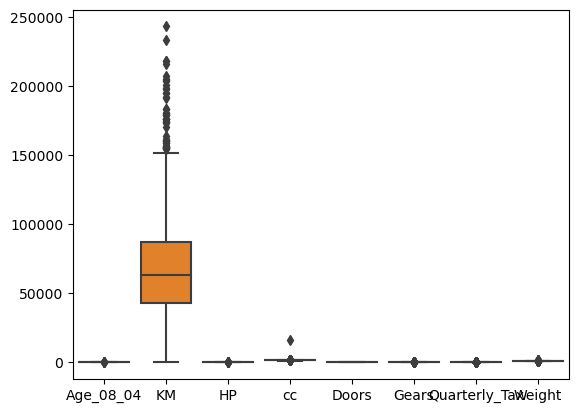

In [13]:
sns.boxplot(data=data.drop('Price',axis=1));

In [14]:
# With the above box plot we can see there are a lot of outliers present in the dataset but due to loss of information,
# we keep outliers as it is.

# Data Visualization

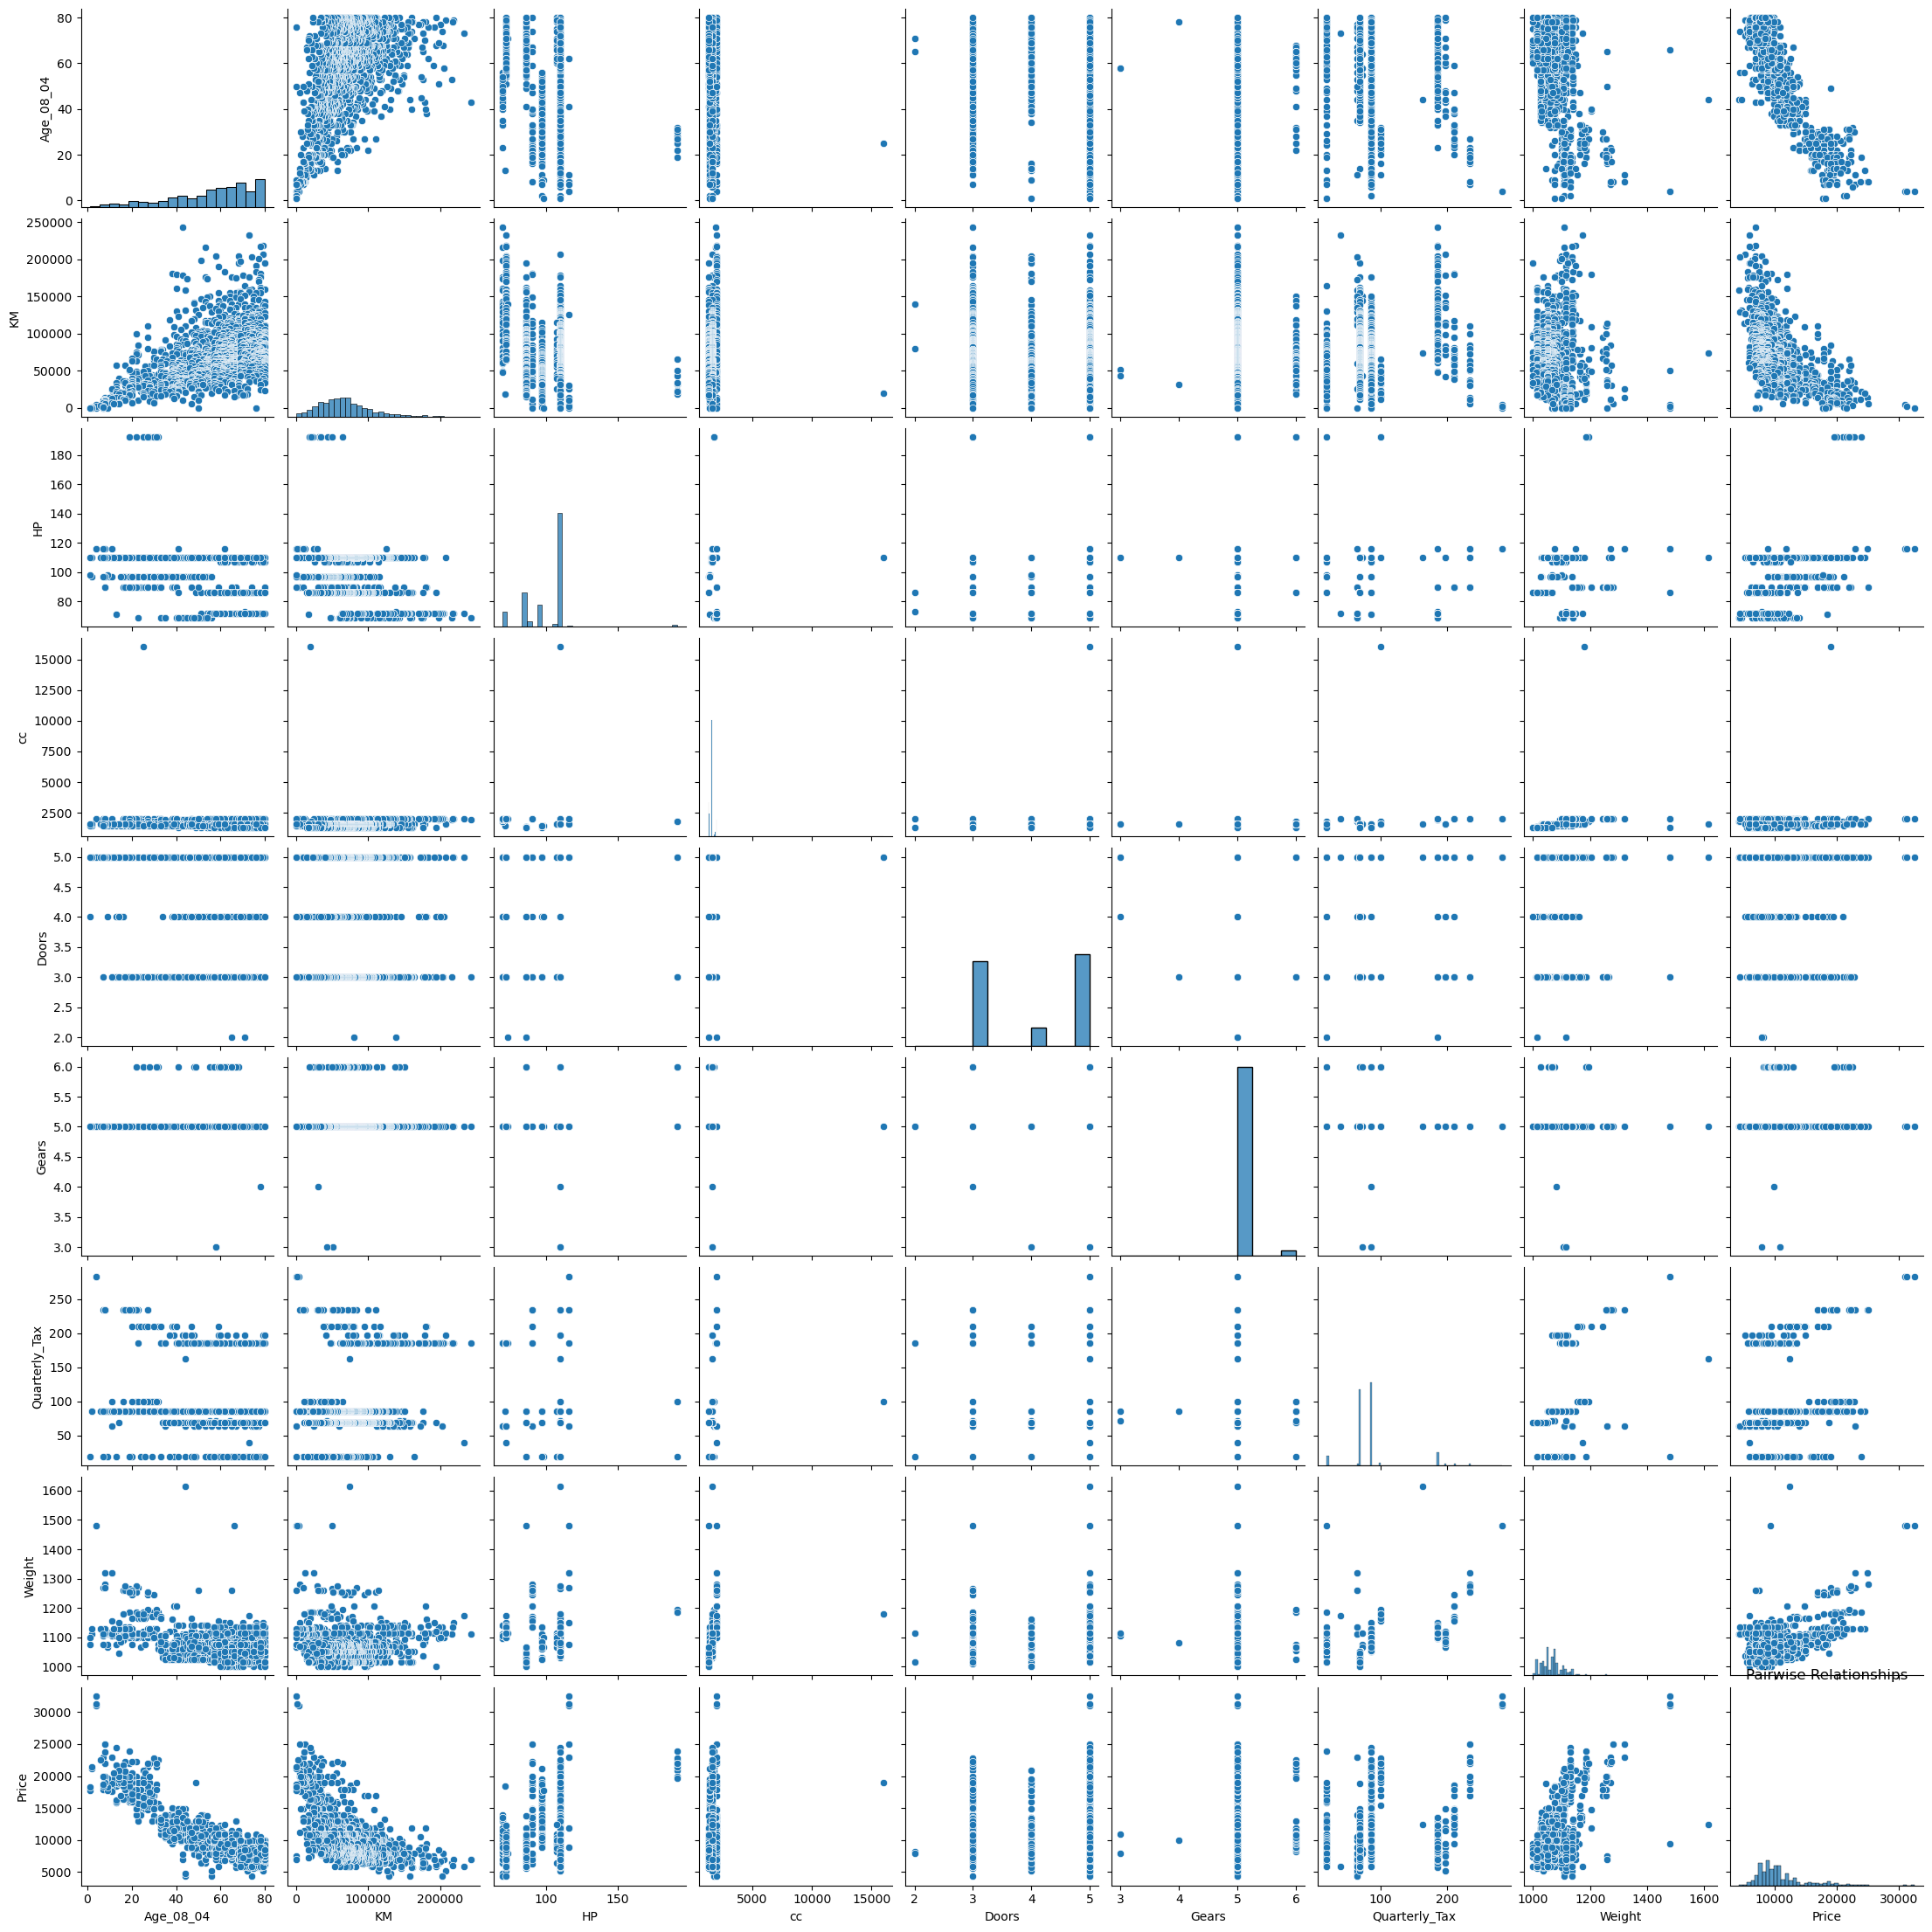

In [15]:
sns.pairplot(data)
plt.title("Pairwise Relationships")
plt.show()

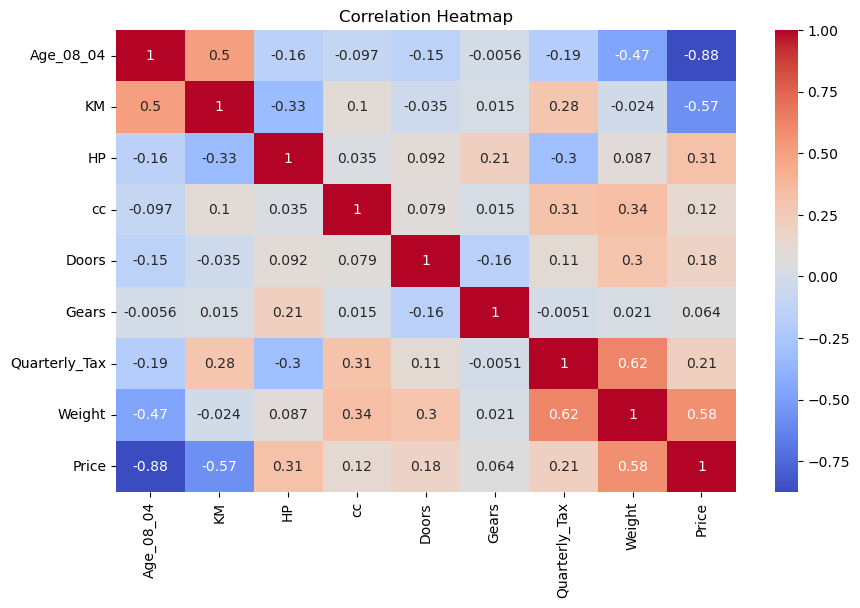

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

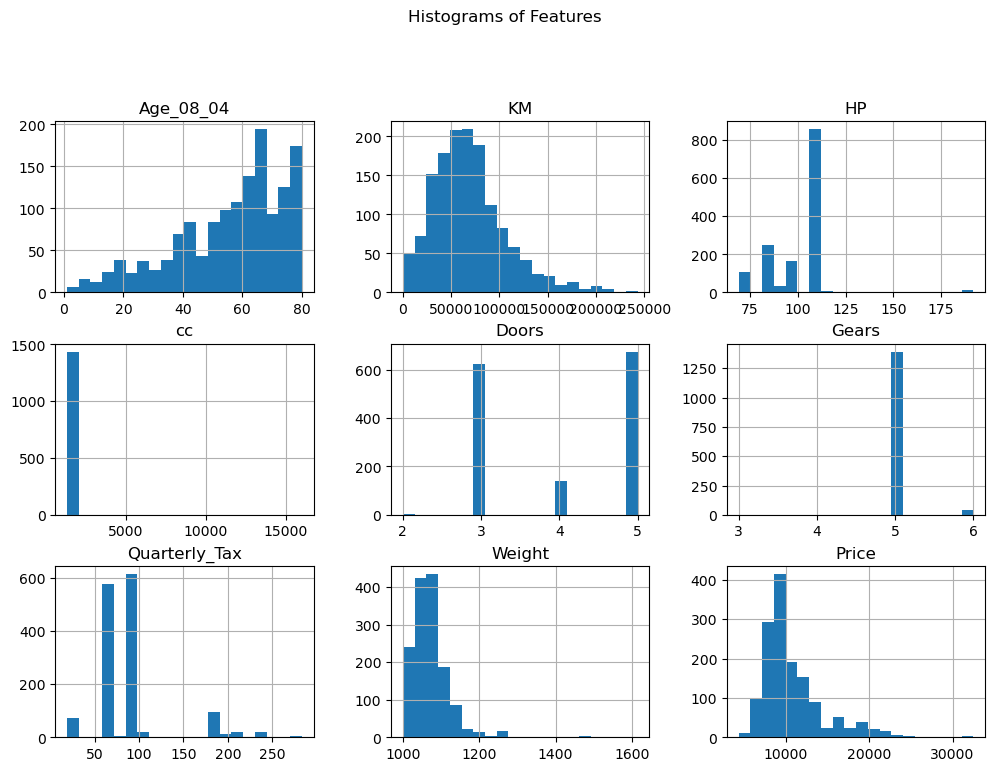

In [17]:
data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Features", y=1.02)
plt.show()

# Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Model Selection

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

# Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1044.3798007816304
Mean Squared Error (MSE): 1984130.7767104763
Root Mean Squared Error (RMSE): 1408.5917707804758
R-squared (R2): 0.843283695277127


# Model Deployment

In [23]:
# from joblib import dump,load

In [24]:
# dump(lasso_cv_model, 'final_lasso_cv_model.joblib')